In this kernel, we use efficientnet to complete the binary classification task. **This kernel is especially helpful if you are making an introduction to computer vision and deep learning in general**. In order to solve this challenge, the steps I take are the following:
1. Specify where the training and test folders are
2. Visualize a few images to know what data we're dealing with
3. Use Keras's ImageDataGenerator to augment the training data. If you haven't used this library before, or are new to data augmentation, take a look at this link: [http://keras.io/preprocessing/image/](http://)
4. We use a pre-trained model called EfficientNet. You don't need to know how this works. We just feed the data to the model we obtain online, and it gives us a good accuracy.
5. We finally make our predictions on the test images in the test zip file and format the submission.csv file to hold our own submissions!


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import os
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray
from PIL import Image
import glob
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Any results you write to the current directory are saved as output.

['rsmodel', 'testdataset']


In [2]:
test_dir = '../input/testdataset/TEST_CROPPED'
df = pd.read_csv('../input/testdataset/TEST_CROPPED/Test_Set.csv')
df.head(30)

Unnamed: 0   ID  Disease_Risk  DR  ARMD  ...    EDN  RPEC  MHL  RP  OTHER
0            0    2             1   0     0  ...      0     0    0   0      0
1            1    8             1   0     0  ...      0     0    0   0      0
2            2  523             1   0     0  ...      0     0    0   0      0
3            3  525             1   0     0  ...      0     0    0   0      0
4            4  528             1   0     1  ...      0     0    0   0      0
5            5  529             1   1     0  ...      0     0    0   0      0
6            6  530             1   1     0  ...      0     0    0   0      0
7            7  533             1   1     0  ...      0     0    0   0      0
8            8   22             1   0     0  ...      0     0    0   0      0
9            9  535             1   0     0  ...      0     0    0   0      0
10          10   26             1   1     0  ...      0     0    0   0      0
11          11  539             1   0     0  ...      0     0    0   0      0
12          12   27             1   0     0  ...      0     0    0   0      0
13          13  542             1   0     0  ...      0     0    0   0      0
14          14   31             1   0     0  ...      0     0    0   0      0
15          15  546             1   0     0  ...      0     0    0   0      0
16          16  548             1   0     0  ...      0     0    0   0      0
17          17   37             1   0     0  ...      0     0    0   0      0
18          18  549             1   0     0  ...      0     0    0   0      0
19          19   46             1   0     0  ...      0     0    0   0      0
20          20  558             1   0     0  ...      0     0    0   0      0
21          21   49             1   0     0  ...      0     0    0   0      0
22          22   50             1   0     0  ...      0     0    0   0      0
23          23   54             1   0     0  ...      0     0    1   0      0
24          24   55             1   0     0  ...      0     0    0   0      1
25          25   56             1   0     0  ...      0     0    0   0      1
26          26   57             1   0     0  ...      0     0    0   0      0
27          27   59             1   0     0  ...      0     0    0   0      0
28          28   62             1   0     0  ...      0     0    0   0      0
29          29   63             1   0     0  ...      0     0    0   0      0

[30 rows x 31 columns]

In [3]:
df = df.sort_values(by=['ID'])
df.head(30)

Unnamed: 0  ID  Disease_Risk  DR  ARMD  ...    EDN  RPEC  MHL  RP  OTHER
0             0   2             1   0     0  ...      0     0    0   0      0
1             1   8             1   0     0  ...      0     0    0   0      0
8             8  22             1   0     0  ...      0     0    0   0      0
10           10  26             1   1     0  ...      0     0    0   0      0
12           12  27             1   0     0  ...      0     0    0   0      0
14           14  31             1   0     0  ...      0     0    0   0      0
181         181  34             1   0     0  ...      0     0    0   0      0
17           17  37             1   0     0  ...      0     0    0   0      0
182         182  40             1   0     0  ...      0     0    0   0      0
19           19  46             1   0     0  ...      0     0    0   0      0
21           21  49             1   0     0  ...      0     0    0   0      0
22           22  50             1   0     0  ...      0     0    0   0      0
23           23  54             1   0     0  ...      0     0    1   0      0
24           24  55             1   0     0  ...      0     0    0   0      1
25           25  56             1   0     0  ...      0     0    0   0      1
26           26  57             1   0     0  ...      0     0    0   0      0
27           27  59             1   0     0  ...      0     0    0   0      0
28           28  62             1   0     0  ...      0     0    0   0      0
29           29  63             1   0     0  ...      0     0    0   0      0
30           30  64             1   0     0  ...      0     0    0   0      0
31           31  65             1   0     0  ...      0     0    0   0      0
33           33  67             1   0     0  ...      0     0    0   0      1
36           36  70             1   0     0  ...      0     0    0   0      0
38           38  74             1   0     0  ...      0     0    0   0      0
183         183  75             1   0     0  ...      0     0    0   0      0
40           40  78             1   0     0  ...      0     0    0   0      0
42           42  81             1   0     0  ...      0     0    0   0      0
44           44  87             1   0     1  ...      0     0    0   0      0
45           45  92             1   0     1  ...      0     0    0   0      0
47           47  94             1   0     1  ...      0     0    0   0      0

[30 rows x 31 columns]

In [4]:
y = df['RS'].tolist()
print(y)
id = df['ID'].tolist()

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
!pip install -U efficientnet

You are using pip version 19.0.3, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from keras import applications
from keras import callbacks
from keras.models import Sequential
import efficientnet.tfkeras as effnet

from keras.layers import Dense
from keras.optimizers import Adam
import cv2
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing import image

model = load_model("../input/rsmodel/RS_MODEL.h5")

Using TensorFlow backend.


Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [7]:
import os
list_of_imgs = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.endswith(".png"):
            list_of_imgs.append((os.path.join(dirname, filename)))
#print(list_of_imgs)

In [8]:
import re 

def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

list_of_imgs = sorted_nicely(list_of_imgs)

In [9]:
from tensorflow.keras.preprocessing.image import load_img
dataset = []

for i in list_of_imgs:
    imag = load_img(i,target_size=(32,32,3))
    data = image.img_to_array(imag)
    data = data/255
    dataset.append(data)
                    
print(len(dataset))

185


In [10]:
y_predict = []
for img in dataset:
    prob = model.predict(img.reshape(1,32,32,3))
    y_predict.append(prob[0][0])
    
print(len(y_predict))
print(y_predict)

185
[4.6201967e-07, 4.1710855e-06, 7.889843e-05, 2.8599696e-09, 1.7647709e-07, 1.5541054e-09, 0.9999987, 2.730618e-07, 7.657738e-08, 1.0847945e-07, 2.8680038e-06, 0.0011585283, 2.7111513e-08, 0.000707876, 2.0755242e-06, 1.1458434e-07, 0.0006917524, 5.6826025e-07, 2.0414949e-07, 3.3346954e-05, 1.5887121e-10, 8.8773295e-06, 3.6136544e-06, 1.9933235e-09, 0.999997, 4.4827626e-09, 2.614839e-07, 0.999946, 0.0013897973, 5.5187456e-08, 0.00015675186, 0.9997433, 2.7434368e-07, 3.562515e-07, 0.00045035937, 0.2476234, 2.907127e-07, 4.3399834e-07, 0.00026128948, 4.1572346e-08, 2.0070423e-09, 2.9629248e-07, 0.0004103082, 5.2606975e-07, 0.0042948015, 8.16233e-07, 4.9016165e-08, 0.9999987, 0.9999987, 0.9999945, 1.1339965e-06, 0.030544847, 4.113847e-06, 7.600215e-09, 2.2135566e-07, 2.004739e-09, 1.19196315e-08, 1.0992195e-08, 2.3696842e-07, 5.206379e-06, 0.00024962396, 0.00018080382, 0.0008100496, 2.8720442e-06, 4.9644937e-09, 0.0011635566, 6.276717e-08, 1.5660254e-09, 0.29161322, 4.4836006e-06, 6.713

In [11]:
a = []
for i in y_predict:
    if i>0.5:
        a.append(1)
    else:
        a.append(0)
print(len(a))

185


--------------------------------------------------
Accuracy: 0.9567567567567568
Mis-Classification: 0.043243243243243246
Sensitivity: 0.5
Specificity: 0.9668508287292817
Precision: 0.9668508287292817
f_1 Score: 0.6591337099811676


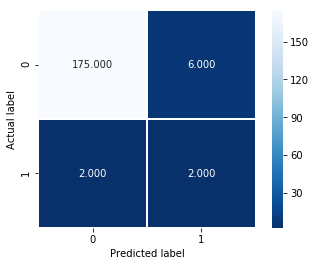

In [12]:
import sklearn
cm = sklearn.metrics.confusion_matrix(y, a)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
    
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate mis-classification
conf_misclassification = 1- conf_accuracy
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {conf_accuracy}') 
print(f'Mis-Classification: {conf_misclassification}') 
print(f'Sensitivity: {conf_sensitivity}') 
print(f'Specificity: {conf_specificity}') 
print(f'Precision: {conf_precision}')
print(f'f_1 Score: {conf_f1}')

In [13]:
df = pd.DataFrame(list(zip(id, y,a)),
               columns =['ID', 'Expected_RS','Predicted_RS'])

df.head()
df.to_csv("RS_results.csv")

In [15]:
df.head(50)

ID  Expected_RS  Predicted_RS
0     2            0             0
1     8            0             0
2    22            0             0
3    26            0             0
4    27            0             0
5    31            0             0
6    34            1             1
7    37            0             0
8    40            1             0
9    46            0             0
10   49            0             0
11   50            0             0
12   54            0             0
13   55            0             0
14   56            0             0
15   57            0             0
16   59            0             0
17   62            0             0
18   63            0             0
19   64            0             0
20   65            0             0
21   67            0             0
22   70            0             0
23   74            0             0
24   75            1             1
25   78            0             0
26   81            0             0
27   87            0             1
28   92            0             0
29   94            0             0
30   95            0             0
31   98            0             1
32  102            0             0
33  103            0             0
34  106            0             0
35  109            0             0
36  113            0             0
37  118            0             0
38  122            0             0
39  133            0             0
40  135            0             0
41  138            0             0
42  145            0             0
43  151            0             0
44  153            0             0
45  158            0             0
46  159            0             0
47  168            0             1
48  169            0             1
49  174            0             1